# 신용카드_이상거래_예측분석
- https://www.kaggle.com/datasets/youssefismail20/fraudsynth-credit-fraud-detection-dataset

### 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

### 데이터 불러오기 및 확인

In [96]:
data = pd.read_csv('./data/fraud_detection_dataset.csv')
data.head()

,timestamp,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score
0,2023-12-15 02:48:24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,998.99,Grantfurt,Mobile,0,56,42524.98,8394.05,655
1,2023-10-30 11:08:37,3675ed98-6863-4bae-b089-6f0db2df006b,241.39,Kimberlychester,Tablet,0,52,69884.04,28434.06,395
2,2023-11-21 05:19:35,4be1043f-20ee-4ac5-a689-b25c6a1de50c,836.42,Gutierrezville,Desktop,0,58,126953.62,39121.78,496
3,2023-11-07 00:03:25,cad0b3c9-099f-479b-8043-6d5ecb4e1467,612.74,Markside,Desktop,0,19,128650.70,39652.48,612
4,2023-04-02 14:12:23,b6ebea7d-ba62-41d7-b042-3978a23fef8b,135.55,Anthonyshire,Tablet,0,59,102020.39,7439.81,302


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     object 
 1   user_id       object 
 2   amount        float64
 3   location      object 
 4   device_type   object 
 5   is_fraud      int64  
 6   age           int64  
 7   income        float64
 8   debt          float64
 9   credit_score  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 152.6+ MB


### 컬럼 확인
- timestamp : 거래일자
- user_id : 고객ID
- amount : 총거래금액
- location : 거래발생위치(도시)
- device_type : 거래발생기기
- is_fraud : 이상거래여부
- age : 고객나이
- income : 고객수입
- debt : 고객추정빚
- credit_score : 고객신용점수

In [98]:
data.describe()

,amount,is_fraud,age,income,debt,credit_score
count,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00
mean,1751.68,0.50,44.00,85020.99,24984.04,574.79
std,1504.16,0.50,15.30,37532.01,14440.05,159.12
min,10.00,0.00,18.00,20000.09,0.04,300.00
25%,504.34,0.00,31.00,52530.58,12465.51,437.00
50%,1000.00,0.50,44.00,85032.87,24980.93,575.00
75%,2996.71,1.00,57.00,117537.45,37480.29,713.00
max,4999.99,1.00,70.00,149999.96,49999.98,850.00


### 결측치 확인/처리 및 중복값 처리

In [99]:
data.isna().sum()

timestamp       0
user_id         0
amount          0
location        0
device_type     0
is_fraud        0
age             0
income          0
debt            0
credit_score    0
dtype: int64

In [100]:
# 중복값 확인
len(data[data.duplicated()])

0

### 이상치 탐지 및 처리

In [101]:
data_num = data.select_dtypes(exclude='object')
data_num.columns

Index(['amount', 'is_fraud', 'age', 'income', 'debt', 'credit_score'], dtype='object')

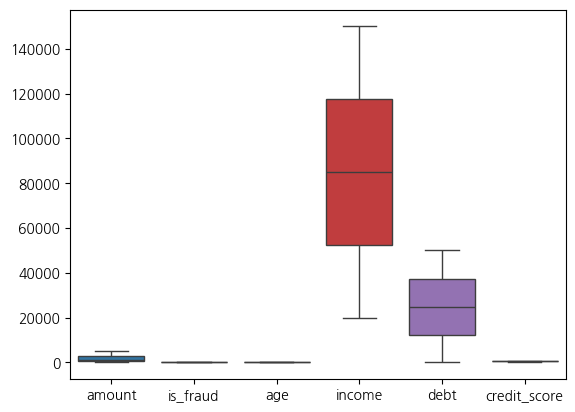

In [81]:
# 박스 플롯 확인
# 이상치가 없음을 확인
sns.boxplot(data_num)
plt.show()

### EDA(탐색적 데이터 분석)

In [102]:
# 종속변수(is_fraud)의 데이터 비율 확인
print(data['is_fraud'].value_counts())

# 이상거래로 판단되는 경우(is_fraud == 1) 전체 데이터셋 중 비율 확인
# print('이상거래(1)인 경우의 비율 =', len(data[data['is_fraud'] == 1]) / len(data) * 100)

# 클래스 불균형 비율 확인
# 클래스 불균형은 없음
data['is_fraud'].value_counts(normalize=True)

is_fraud
0    1000000
1    1000000
Name: count, dtype: int64


is_fraud
0   0.50
1   0.50
Name: proportion, dtype: float64

In [103]:
# 컬럼 데이터 구성 확인
data_obj = data.select_dtypes(include='object')
data_num = data.select_dtypes(exclude='object')

In [104]:
print(data_num.columns)
print(data_obj.columns)

Index(['amount', 'is_fraud', 'age', 'income', 'debt', 'credit_score'], dtype='object')
Index(['timestamp', 'user_id', 'location', 'device_type'], dtype='object')


<Axes: >

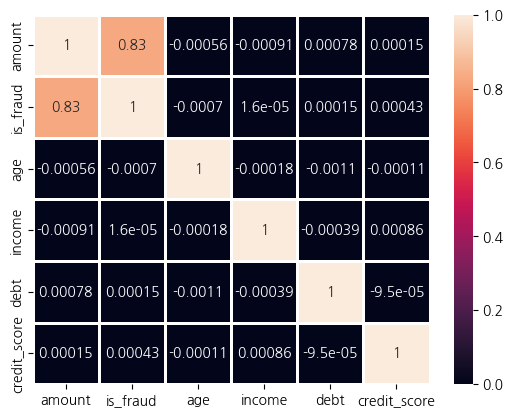

In [107]:
# 각 컬럼의 연관성 확인
sns.heatmap(data_num.corr(), annot=True, linewidth=1)

In [149]:
data['amount'].describe()

count       2000000
unique            5
top       under1000
freq        1000000
Name: amount, dtype: object

In [118]:
# amount를 구분하여 분리하고 이를 컬럼으로 사용
data['amount'] = pd.cut(data['amount'], bins=[0,1000,2000,3000,4000,5000], 
       labels=['under1000', '1000s', '2000s', '3000s', '4000s'], include_lowest=True)

In [133]:
data_num = data.select_dtypes(exclude=['object','category'])

<Axes: >

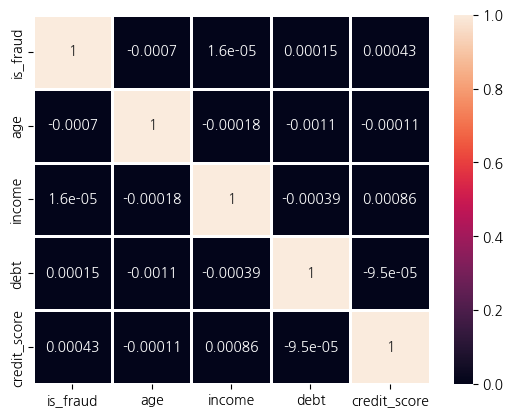

In [132]:
sns.heatmap(data_num.corr(), annot=True, linewidth=1)

In [134]:
# 문자형 데이터 확인
data_obj = data.select_dtypes(include=['object', 'category'])

for col in data_obj:
#     print(col)
    print('='*30, col, '='*30)
    print(f"{col}의 unique 값의 수 = {data_obj[col].nunique()}", end='\n')
    print(data_obj[col].value_counts())
    
    print(data.groupby(col)['is_fraud'].mean().sort_values(ascending=False))
    print()

============================== timestamp ==============================
timestamp의 unique 값의 수 = 1937890
timestamp
2023-07-16 22:02:58    4
2023-12-13 18:37:49    4
2023-08-04 14:26:20    4
2024-02-29 15:05:59    4
2024-01-13 17:57:59    4
                      ..
2023-05-20 17:22:50    1
2023-11-07 19:08:59    1
2023-05-07 11:03:42    1
2023-06-23 14:54:42    1
2024-02-16 02:50:25    1
Name: count, Length: 1937890, dtype: int64
timestamp
2023-08-31 03:45:47   1.00
2023-09-19 17:21:17   1.00
2023-09-19 17:24:54   1.00
2023-09-19 17:24:41   1.00
2023-09-19 17:23:01   1.00
                      ... 
2023-10-02 05:35:50   0.00
2023-10-02 05:35:58   0.00
2023-10-02 05:36:11   0.00
2023-05-14 21:36:10   0.00
2023-03-01 14:27:00   0.00
Name: is_fraud, Length: 1937890, dtype: float64

============================== user_id ==============================
user_id의 unique 값의 수 = 2000000
user_id
3cbf0b8a-c799-4c0e-9782-89272ab8fa2b    1
80b8e1fe-31e7-4a29-8dda-6a44f619cc84    1
514e73b3-dc91-4085

/var/folders/z7/fnj90w897m970f0j3hw_sqv40000gn/T/ipykernel_14320/2970706398.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby(col)['is_fraud'].mean().sort_values(ascending=False))


location의 unique 값의 수 = 104592
location
East Michael          1713
Lake Michael          1702
New Michael           1626
Port Michael          1624
West Michael          1604
                      ... 
South Jaymouth           1
North Beckytown          1
New Caitlinshire         1
North Beckyborough       1
Port Miguelport          1
Name: count, Length: 104592, dtype: int64
location
New Sethport          1.00
South Isaacburgh      1.00
North Tannerchester   1.00
South Ianview         1.00
North Tannerburgh     1.00
                      ... 
Lake Beverlyhaven     0.00
Port Tanyaburgh       0.00
Lake Bettytown        0.00
Port Tannerport       0.00
Port Harryberg        0.00
Name: is_fraud, Length: 104592, dtype: float64

============================== device_type ==============================
device_type의 unique 값의 수 = 3
device_type
Tablet     668072
Desktop    666273
Mobile     665655
Name: count, dtype: int64
device_type
Desktop   0.50
Tablet    0.50
Mobile    0.50
Name: is_fraud,

### location, device_type 이 유의한 컬럼이라고 생각
- location은 바로 인코딩하는 경우 10만개 이상의 컬럼이 생성
- 상위 50개 지역과 나머지는 others로 묶어서 처리
- device_type은 바로 인코딩해도 문제 없음

============================== is_fraud ==============================
count   2000000.00
mean          0.50
std           0.50
min           0.00
25%           0.00
50%           0.50
75%           1.00
max           1.00
Name: is_fraud, dtype: float64



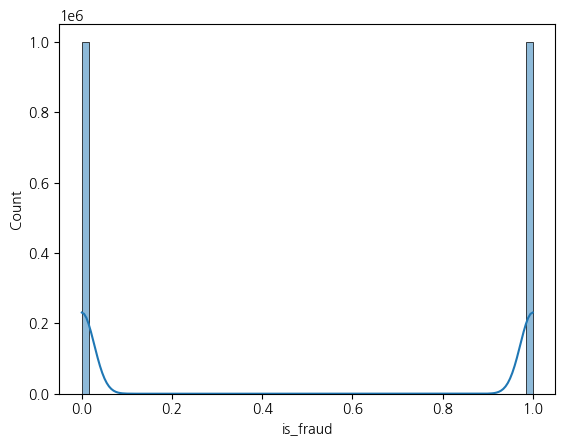




is_fraud
1   1.00
0   0.00
Name: is_fraud, dtype: float64

============================== age ==============================
count   2000000.00
mean         44.00
std          15.30
min          18.00
25%          31.00
50%          44.00
75%          57.00
max          70.00
Name: age, dtype: float64



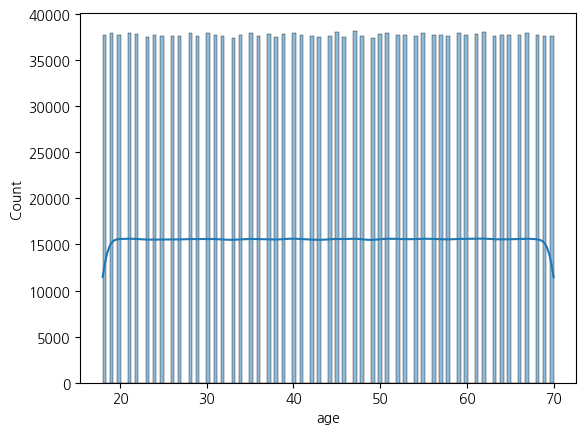




age
35   0.50
21   0.50
33   0.50
42   0.50
24   0.50
19   0.50
66   0.50
62   0.50
31   0.50
55   0.50
32   0.50
26   0.50
39   0.50
37   0.50
70   0.50
59   0.50
38   0.50
30   0.50
69   0.50
60   0.50
36   0.50
54   0.50
52   0.50
29   0.50
20   0.50
67   0.50
46   0.50
40   0.50
47   0.50
48   0.50
22   0.50
51   0.50
57   0.50
53   0.50
34   0.50
64   0.50
41   0.50
23   0.50
28   0.50
49   0.50
50   0.50
68   0.50
25   0.50
18   0.50
65   0.50
61   0.50
63   0.50
56   0.50
45   0.50
44   0.50
27   0.50
58   0.50
43   0.49
Name: is_fraud, dtype: float64

============================== income ==============================
count   2000000.00
mean      85020.99
std       37532.01
min       20000.09
25%       52530.58
50%       85032.87
75%      117537.45
max      149999.96
Name: income, dtype: float64



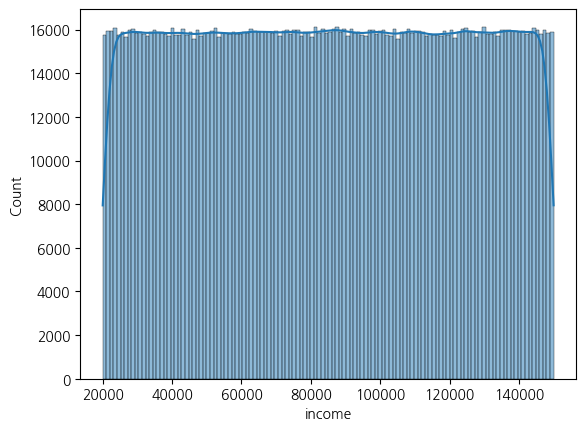




income
85041.60    1.00
124245.02   1.00
124245.19   1.00
73678.53    1.00
73678.60    1.00
            ... 
78527.42    0.00
78527.14    0.00
78527.10    0.00
78526.86    0.00
149999.96   0.00
Name: is_fraud, Length: 1854147, dtype: float64

============================== debt ==============================
count   2000000.00
mean      24984.04
std       14440.05
min           0.04
25%       12465.51
50%       24980.93
75%       37480.29
max       49999.98
Name: debt, dtype: float64



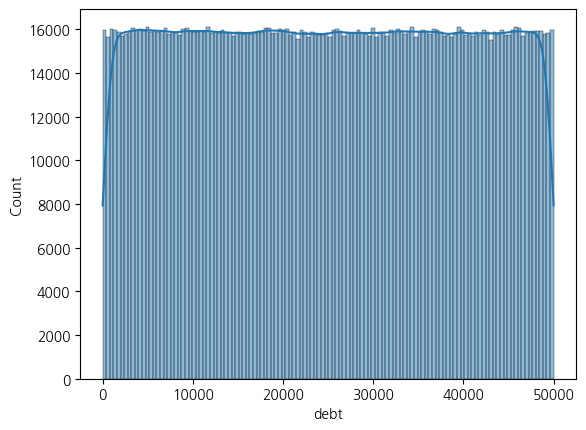




debt
0.04       1.00
27037.06   1.00
27035.79   1.00
27035.85   1.00
27035.95   1.00
           ... 
29405.54   0.00
9258.58    0.00
29405.75   0.00
29405.77   0.00
24984.14   0.00
Name: is_fraud, Length: 1649272, dtype: float64

============================== credit_score ==============================
count   2000000.00
mean        574.79
std         159.12
min         300.00
25%         437.00
50%         575.00
75%         713.00
max         850.00
Name: credit_score, dtype: float64



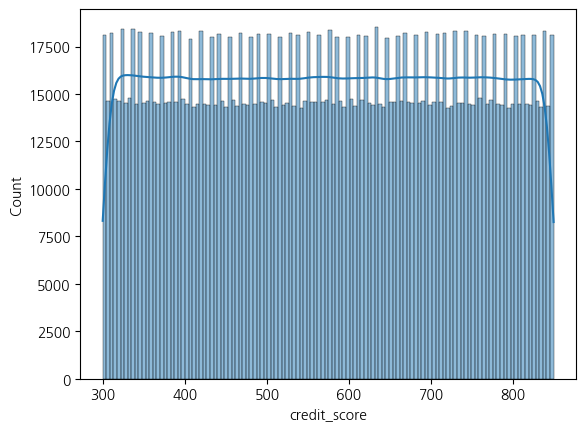




credit_score
518   0.53
446   0.52
386   0.52
398   0.52
755   0.52
      ... 
822   0.48
799   0.48
315   0.48
532   0.47
704   0.47
Name: is_fraud, Length: 551, dtype: float64



In [135]:
# 숫자형 데이터 확인

for col in data_num:
#     print(col)
    print('='*30, col, '='*30)
    print(f"{data_num[col].describe()}", end='\n\n')
    
    sns.histplot(data_num[col], kde=True)
    plt.show()
    print('\n\n')

    print(data.groupby(col)['is_fraud'].mean().sort_values(ascending=False))
    print()


In [136]:
# 시간 파생변수 나누어 확인
# 일자 및 시간 확인
data['timestamp'] = pd.to_datetime(data['timestamp'])
# data2['timestamp'].dtype

# 일자, 시간 요일
data['Year'] = data['timestamp'].dt.year
data['Month'] = data['timestamp'].dt.month
data['Day'] = data['timestamp'].dt.day
data['Hour'] = data['timestamp'].dt.hour
data['Min'] = data['timestamp'].dt.minute
data['Sec'] = data['timestamp'].dt.second
data['Day_Name'] = data['timestamp'].dt.day_name()


In [137]:
data.columns

Index(['timestamp', 'user_id', 'amount', 'location', 'device_type', 'is_fraud',
       'age', 'income', 'debt', 'credit_score', 'Year', 'Month', 'Day', 'Hour',
       'Min', 'Sec', 'Day_Name'],
      dtype='object')

In [138]:
data = data[['timestamp', 'Year', 'Month', 'Day', 'Hour','Min', 'Sec', 'Day_Name',
      'user_id', 'amount', 'location', 'device_type', 'is_fraud',
       'age', 'income', 'debt', 'credit_score']]

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   timestamp     datetime64[ns]
 1   Year          int32         
 2   Month         int32         
 3   Day           int32         
 4   Hour          int32         
 5   Min           int32         
 6   Sec           int32         
 7   Day_Name      object        
 8   user_id       object        
 9   amount        category      
 10  location      object        
 11  device_type   object        
 12  is_fraud      int64         
 13  age           int64         
 14  income        float64       
 15  debt          float64       
 16  credit_score  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int32(6), int64(3), object(4)
memory usage: 200.3+ MB


In [145]:
# 새로운 컬럼들이 추가되어 구분
data_num = data.select_dtypes(exclude='object')
data_obj = data.select_dtypes(include='object')

In [146]:
data_num.head(2)

,timestamp,Year,Month,Day,Hour,Min,Sec,amount,is_fraud,age,income,debt,credit_score
0,2023-12-15 02:48:24,2023,12,15,2,48,24,under1000,0,56,42524.98,8394.05,655
1,2023-10-30 11:08:37,2023,10,30,11,8,37,under1000,0,52,69884.04,28434.06,395


In [147]:
data_obj.head(2)

,Day_Name,user_id,location,device_type
0,Friday,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,Grantfurt,Mobile
1,Monday,3675ed98-6863-4bae-b089-6f0db2df006b,Kimberlychester,Tablet


<Axes: >

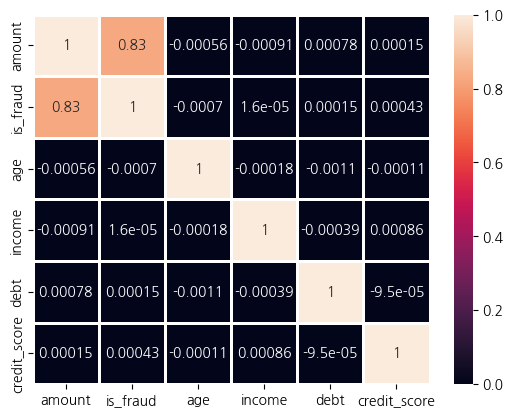

In [21]:
# 각 컬럼의 연관성 확인
sns.heatmap(data_num.corr(), annot=True, linewidth=1)

#### is_fraud(종속변수)와 연관성이 있는 컬럼은 amount만 의미 있음

In [22]:
# location의 데이터를 구분
loc_value = data['location'].value_counts()
loc_value[loc_value >= 1000]

location
East Michael         1713
Lake Michael         1702
New Michael          1626
Port Michael         1624
West Michael         1604
North Michael        1601
South Michael        1579
North David          1181
Michaelmouth         1177
Lake David           1158
Smithmouth           1118
Port David           1117
Port Jennifer        1114
South David          1104
East David           1102
West David           1088
New David            1085
West Jennifer        1084
Lake John            1083
West James           1083
South Jennifer       1080
West John            1079
Lake James           1067
North James          1066
East James           1062
South John           1058
North Christopher    1051
East John            1041
South James          1041
Lake Jennifer        1039
New James            1038
Port John            1033
West Christopher     1033
North John           1026
East Jennifer        1024
New John             1012
New Jennifer         1010
Port James           1009
Sou

In [23]:
# location 컬럼 데이터 변환
loc_value = data['location'].value_counts()

# 조건에 맞으면 변환
data['location'] = data['location'].apply(lambda x:x if loc_value[x] >= 1000 else 'Others')
data['location'].nunique()

40

In [24]:
data.columns

Index(['timestamp', 'user_id', 'amount', 'location', 'device_type', 'is_fraud',
       'age', 'income', 'debt', 'credit_score'],
      dtype='object')

In [18]:
# 원핫인코딩 진행
data_use = data.drop(['timestamp', 'user_id'], axis=1)

# 원핫인코딩 적용
data_use = pd.get_dummies(data_use, drop_first=True)